# Austin House Data Summary

The Austin House Data comes from Kaggle and the publisher's goal was to study Austin's housing market. The publisher claimed that Austin's housing market is "one of the hottest markets in 2021" and that researchers can use the data to predict home price.

## Part 1: Formatting The Data Set

In [1]:
# Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker

In [2]:
path = "../data/Austin_Housing_Data.csv"
house_data = pd.read_csv(path, header = 0)

There are 15,171 observations and 47 columns in the data set. There are several columns that are object types. The coreset algorithms do not consider these data types. Therefore, we will remove the columns that are not floats or integer types. For now, we will also keep the boolean data types in the data set. If we find that the algorithm does no support booleans, we may remove them later.

In [3]:
# Identify numeric columns and remove columns with string and character types(non-categorical)
remove_columns = (house_data.dtypes == "float64") | (house_data.dtypes == "int64") | (house_data.dtypes == "bool") 
house_data = house_data.iloc[:, remove_columns.values]

There are also a few columns that have numeric data types, but do not have numeric significance. For example, the difference between two zip codes or the max zip code does not have a numerical meaning. Therefore, we will remove these columns from the data set.

In [4]:
# Remove columns:
remove_columns = ~house_data.columns.isin(['zpid', 'zipcode', 'latest_salemonth', 'numOfPhotos'])
house_data = house_data.iloc[:, remove_columns]

Lastly, we change the values for yearBuilt and latest_saleyear. Instead of the year, we alter the values to be the difference between the current year(data set publish year 2021) and the observation year. This means we will change yearBuilt to houseAge and latest_saleyear to numYearsLastSale(number of years since last sale). 

In [5]:
# Change the yearBuilt and latest_saleyear columns:
house_data.loc[:,"yearBuilt"] = 2021 - house_data.loc[:,"yearBuilt"]
house_data.loc[:,"latest_saleyear"] = 2021 - house_data.loc[:,"latest_saleyear"]
# Change the column names:
house_data = house_data.rename(columns = {'yearBuilt':'houseAge', 'latest_saleyear':'numYearsLastSale'})

In [6]:
# Check for missing values: 
print(all(house_data.isna().any() == False))
print(all(house_data.isnull().any() == False))

True
True


In [7]:
house_data.shape

(15171, 36)

In [8]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   latitude                    15171 non-null  float64
 1   longitude                   15171 non-null  float64
 2   propertyTaxRate             15171 non-null  float64
 3   garageSpaces                15171 non-null  int64  
 4   hasAssociation              15171 non-null  bool   
 5   hasCooling                  15171 non-null  bool   
 6   hasGarage                   15171 non-null  bool   
 7   hasHeating                  15171 non-null  bool   
 8   hasSpa                      15171 non-null  bool   
 9   hasView                     15171 non-null  bool   
 10  parkingSpaces               15171 non-null  int64  
 11  houseAge                    15171 non-null  int64  
 12  latestPrice                 15171 non-null  float64
 13  numPriceChanges             151

After some manipulation, the final data set for the algorithm contains 37 columns. There are no missing values in the data set. The final predictor variables include latitude, longitude, property tax rate, garage spaces, parking spaces, house age, number of price changes, number of years since the last sale, number of photos, number of accessibility features, number of appliances, number of parking features, number of patio and porch features, number of security features, number of waterfront features, number of window features, number of community features, lot size square feet, living area square feet, number of primary schools nearby, number of elementary schools nearby, number of middle schools nearby, number of high schools nearby, average school distance, average school rating, average school size, median number of students per teacher, number of bathrooms, number of bedrooms, number of stories, has association, has cooling, has a garage, has heating, has a spa, and has a view. The response variable is the latest house price.

# Part 2: Descriptive Statistics

In this section, we provided a "concise" overview of the data. First, we identify descriptive statistics for each variable. The table below contains the counts, mean, standard deviation, percentiles, minimum, and maximum for each variable.

In [9]:
# We move the response variable to the first spot:
column_name = "latestPrice"
column_data = house_data.pop("latestPrice")
house_data.insert(0, column_name, column_data)

In [10]:
house_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,latestPrice,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,houseAge,numPriceChanges,numYearsLastSale,numOfAccessibilityFeatures,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,15171,15171,15171,15171,15171,15171,15171,15171,15171,15171,...,15171,15171,15171,15171,15171,15171,15171,15171,15171,15171
mean,512768,30.2916,-97.7785,1.99408,1.22919,1.22451,32.4453,3.03289,1.92176,0.0129853,...,0.0491728,1.03599,0.976798,1.83849,5.77991,1237.3,14.8572,2.68301,3.44038,1.46727
std,453185,0.0969731,0.0847149,0.053102,1.35212,1.35273,21.5795,2.48739,0.813941,0.179438,...,0.234937,0.263633,0.292043,1.06838,1.86028,326.513,1.74186,1.05445,0.849942,0.523697
min,5500,30.085,-98.0221,1.98,0,0,1,1,0,0,...,0,0,0,0.2,2.33333,396,10,0,0,1
25%,309000,30.2033,-97.838,1.98,0,0,15,1,1,0,...,0,1,1,1.1,4,966,14,2,3,1
50%,405000,30.2844,-97.7695,1.98,1,1,28,2,2,0,...,0,1,1,1.56667,5.77869,1287,15,3,3,1
75%,575000,30.3666,-97.7179,1.98,2,2,47,4,3,0,...,0,1,1,2.26667,7,1496,16,3,4,2
max,1.35e+07,30.5173,-97.5695,2.21,22,22,116,23,3,8,...,2,3,2,9,9.5,1913,19,27,20,4


Some interesting details are the average home price in Austin is \\$512,768, the max home price is about $13 million, the average number of bathrooms is 2.68(about 3), the average number of bedrooms is 3.44(about 3), the max number of bathrooms a house has is 27, and the max number of bedrooms a house has is 20.

Now, we can identify the correlations between the variables.

### Correlation Matrix:

In [11]:
house_data.loc[:, house_data.dtypes != "bool"].corr()

,latestPrice,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,houseAge,numPriceChanges,numYearsLastSale,numOfAccessibilityFeatures,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
latestPrice,1.000000,0.071547,-0.184079,-0.062179,0.157443,0.156811,-0.059692,0.038305,-0.059942,0.016270,...,0.155988,0.127838,-0.201821,0.094156,0.293101,0.085167,0.198208,0.504738,0.299839,0.200555
latitude,0.071547,1.000000,0.347597,0.450187,0.019153,0.018222,0.116519,0.013402,0.042536,-0.014039,...,0.128212,-0.019787,0.130216,-0.043530,0.260637,0.077653,-0.010083,0.053388,0.078542,0.047176
longitude,-0.184079,0.347597,1.000000,-0.013746,-0.115317,-0.114713,0.252537,-0.050127,0.018003,0.015458,...,-0.029789,-0.220102,0.452437,-0.288116,-0.557531,-0.333619,-0.597129,-0.335719,-0.285123,-0.157333
propertyTaxRate,-0.062179,0.450187,-0.013746,1.000000,0.026430,0.024371,-0.118247,-0.028945,0.024598,-0.015598,...,-0.051873,-0.020720,-0.034695,-0.011178,0.184755,0.158509,-0.021681,0.066139,0.098455,0.057537
garageSpaces,0.157443,0.019153,-0.115317,0.026430,1.000000,0.997321,-0.085982,0.120748,-0.311164,0.070329,...,0.029057,0.044912,-0.064993,0.079953,0.092672,0.034451,0.062567,0.199309,0.163637,0.094983
parkingSpaces,0.156811,0.018222,-0.114713,0.024371,0.997321,1.000000,-0.085655,0.121268,-0.307044,0.070547,...,0.029354,0.043885,-0.064237,0.078813,0.091906,0.033859,0.062395,0.198224,0.162546,0.095979
houseAge,-0.059692,0.116519,0.252537,-0.118247,-0.085982,-0.085655,1.000000,0.043953,0.027324,0.002014,...,-0.037267,-0.077693,0.013114,-0.324713,-0.134781,-0.296456,-0.099023,-0.430429,-0.275688,-0.369571
numPriceChanges,0.038305,0.013402,-0.050127,-0.028945,0.120748,0.121268,0.043953,1.000000,0.007620,-0.009819,...,0.019116,0.021617,-0.039603,0.004918,0.041357,-0.024041,0.047290,0.098717,0.093767,0.097000
numYearsLastSale,-0.059942,0.042536,0.018003,0.024598,-0.311164,-0.307044,0.027324,0.007620,1.000000,-0.081055,...,0.020465,0.005136,0.020371,0.000093,0.029494,0.043112,0.023830,0.003954,0.005406,0.024535
numOfAccessibilityFeatures,0.016270,-0.014039,0.015458,-0.015598,0.070329,0.070547,0.002014,-0.009819,-0.081055,1.000000,...,-0.004202,0.005449,-0.005572,-0.009189,-0.014367,-0.014263,-0.011151,-0.007509,-0.020209,-0.005649


The above table provides the correlation values between the variables. The most important row/column refers to the latest price. We see that the living area in square feet(livingAreaSqFt) and the number of bathrooms(numOfBathrooms) have the largest positive correlations with latestPrice. The rest of the variables have a relatively low positive/negative correlation with the living area. To get a better picture of the correlations between the predictor variables, we provided the correlation heat map below. 

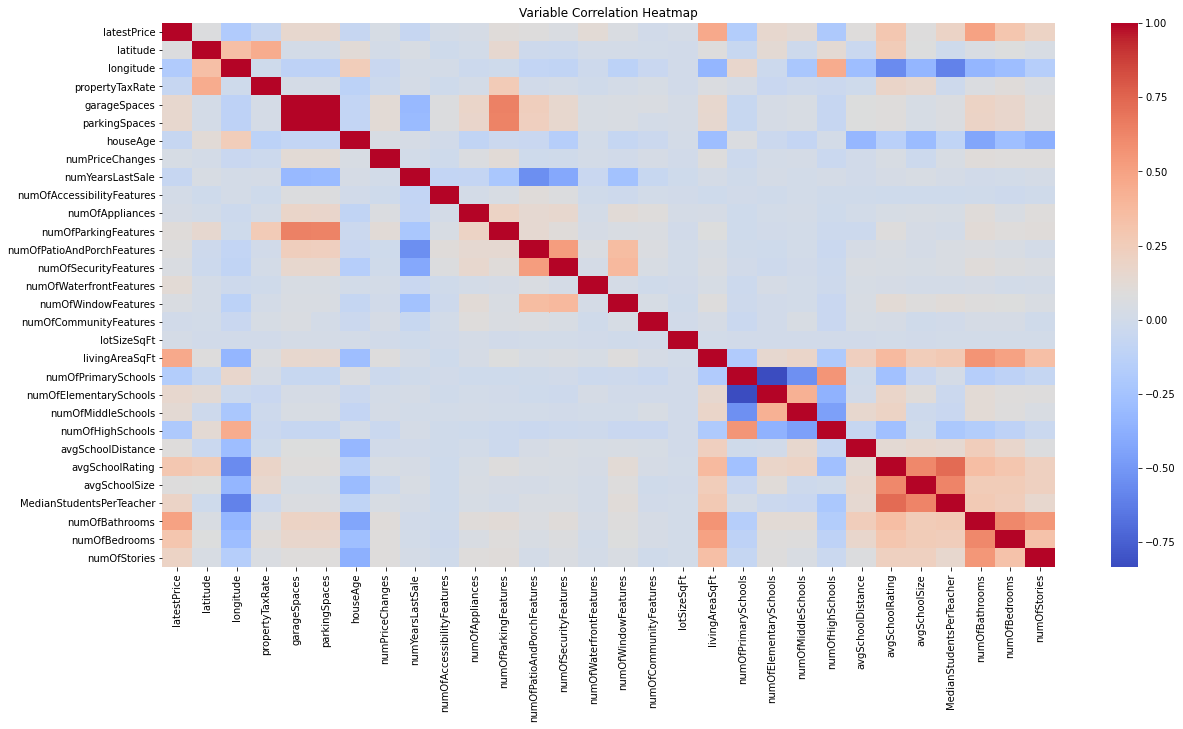

In [12]:
fig = plt.figure(figsize = (20,10))
plt.title("Variable Correlation Heatmap")
sns.heatmap(house_data.loc[:, house_data.dtypes != "bool"].corr(), cmap = "coolwarm");

In the heatmap, the darker(red for positive/blue for negative) squares indicate that the variables are correlated. Some interesting details are longitude seems to have a moderate negative correlation with median students per teacher and average school rating, the number of parking features seems to have a moderate positive correlation with the number of garage spaces and parking spaces, and the number of bathrooms seems to have a relatively positive correlation with the number of bedrooms and the number of stories. These details indicate that some variables may be explaining the changes in Y very similarly. For example, the number of parking features would seem to entail the same information as the number of garage spaces and parking spaces. Therefore, it may be beneficial to use a variable selection technique to avoid overfitting and non-important variables.

### Density plots and Boxplots


In this section, we generate box plots for the boolean variables and histograms for the numeric variables.

The variables we create boxplots for are hasAssociation, hasCooling, hasGarage, hasHeating, hasSpa, and hasView.   

In [13]:
# Function to generate the boxplots for boolean type variables:
def create_boxplot(data, var_start_index, col_num):
    """
    This function creates boxplots for the categorical variables in the Austin Housing data set.
    Parameters:
        data: The full data set
        var_start_index: Starting variable for the boxplot output.
        num_cols: Number of columns for boxplot display(recommend 3).

    """
    fig_new, axs = plt.subplots(ncols= col_num, figsize = (15, 7.27))
    plt.ylim((-1.0e+5, 1.2e+6))
    for i in range(0,col_num):
        sns.boxplot(x = data.columns[data.dtypes == "bool"][var_start_index], y = "latestPrice", data = data, ax = axs[i])
        axs[i].set_title(data.columns[data.dtypes == "bool"][var_start_index] + " Vs House Price")
        axs[i].set_ylim(-1.0e+5, 1.2e+6)
        var_start_index += 1

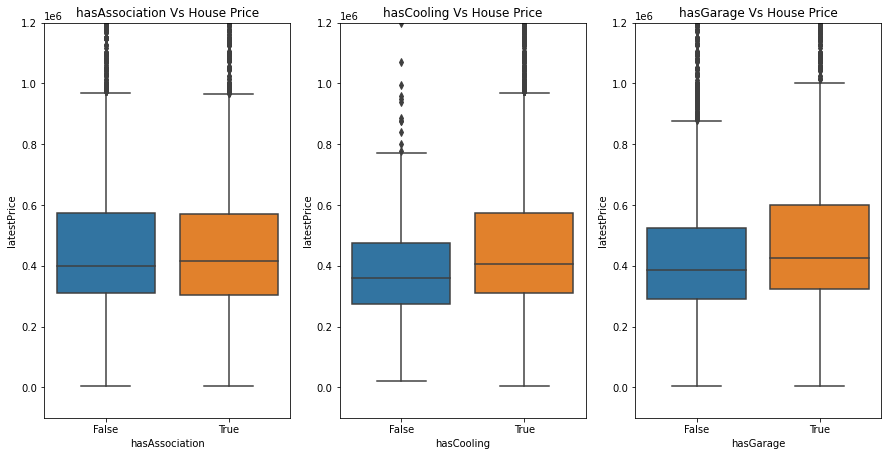

In [14]:
# Boxplots for hasAssociation, hasCooling, and hasGarage
create_boxplot(house_data, 0, 3)

For each variable, there doesn't appear to be a large difference between the latest price when the variable is true and when it is false. All variables have many outliers.

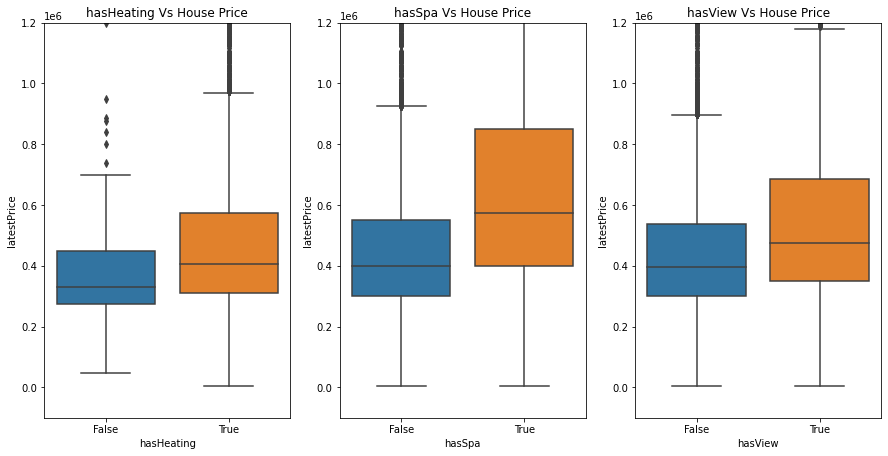

In [15]:
# boxplots for hasHeating, hasSpa, and hasView
create_boxplot(house_data, 3, col_num = 3)

The "hasSpa" variable has the largest difference in medians. This may indicate that houses with spas are slightly more expensive than houses without spas.

In [16]:
# Function to generate the histograms:
def create_histo(num_rows = 2, num_cols= 2, start_point = 0, stop_point = 5):
    """
    This function creates histograms for the numeric variables in the Austin Housing data set.
    Parameters:
        num_rows: Number of rows in histogram display.
        num_cols: Number of columns in histogram display. 
        start_point: The index for the numeric variable we want to appear first in the histogram output.
        stop_point: The index + 1  for the numeric variable we want to appear last in the histogram output.
    """
    fig_new, axs = plt.subplots(nrows = num_rows, ncols= num_cols, figsize = (15, 10.27))
    var_start_index = start_point
    for i in range(0, num_rows):
        for j in range(0, num_cols):
            sns.histplot(house_data.loc[:,house_data.columns[house_data.dtypes != "bool"][var_start_index]],
                       color = 'darkblue', ax = axs[i,j])
            axs[i,j].set_title(house_data.columns[house_data.dtypes != "bool"][var_start_index] + " Histogram")
            var_start_index += 1
            if var_start_index == stop_point:
                return()

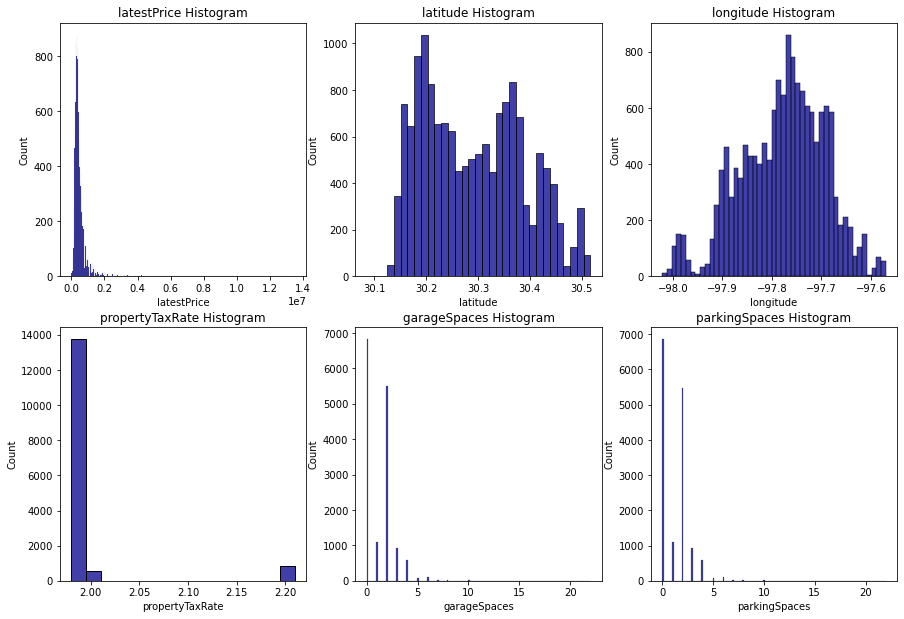

In [17]:
# First six plots:
create_histo(2, 3, 0, 6);

For latestPrice, propertyTaxRate, garageSpaces, and parkSpaces, the histograms appear to be skewed right. This may indicate that there are large outliers for these variables. There are many numeric variables and, for the sake of brevity, we only provide a few more histograms of variables we believe are important for prediction.

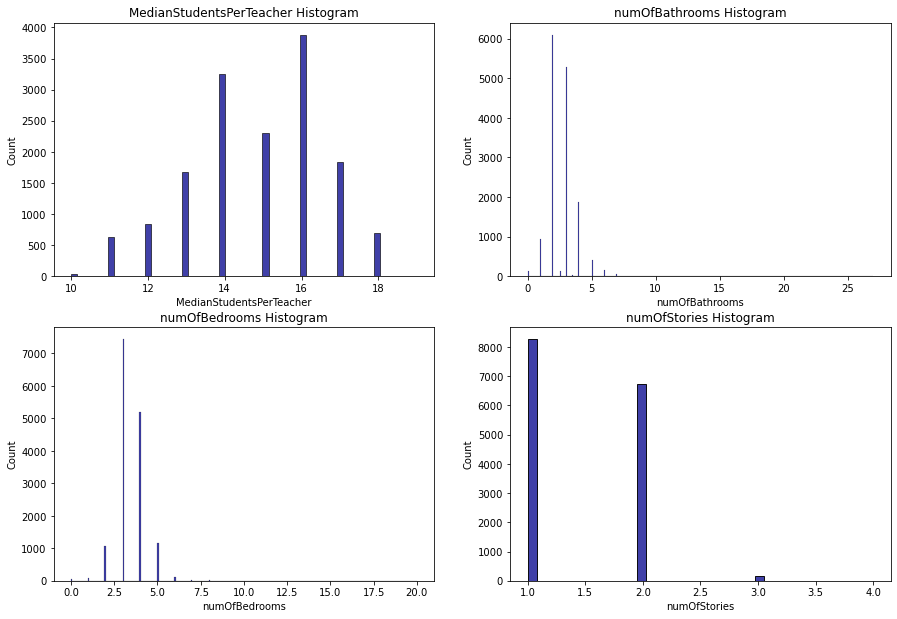

In [18]:
create_histo(2, 2, 26, 30);

The numOfBedrooms and numOfBathrooms histograms indicate large outliers in the data.